In [1]:
!wget https://www.dropbox.com/s/si11cws2pyho1bp/archive.zip

--2021-09-10 15:07:48--  https://www.dropbox.com/s/si11cws2pyho1bp/archive.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6030:18::a27d:5012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/si11cws2pyho1bp/archive.zip [following]
--2021-09-10 15:07:49--  https://www.dropbox.com/s/raw/si11cws2pyho1bp/archive.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0719276ec4503aeea2bcf20e77.dl.dropboxusercontent.com/cd/0/inline/BV5ypO_rHdf_IWLY5Uyp9AfVs5MhqZdZXVwh2HFgUU5y2hbzJfZW4ZQ30ZheiUhzcjNcGdOG6zXhuDy2Q-I0qSzfQIxgZ1wz5fPN7rMT1kINhNlYmRxdCAZRYVbjNMFPrVQnjJantDL6Lxvi57lbLUa9/file# [following]
--2021-09-10 15:07:49--  https://uc0719276ec4503aeea2bcf20e77.dl.dropboxusercontent.com/cd/0/inline/BV5ypO_rHdf_IWLY5Uyp9AfVs5MhqZdZXVwh2HFgUU5y2hbzJfZW4ZQ30ZheiUhzcjNcGdOG6zXhuDy2Q-I0qSzfQIxg

In [2]:
!unzip -q "/content/archive.zip"

In [3]:
## Importing libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

tf.random.set_seed(4)

In [4]:
## Creating the Pathlib path objects for training and testing data
train_data = Path("/content/train")
test_data = Path("/content/test")

In [5]:
## setting paths for images
train_image_paths = list(train_data.glob("*/*"))
train_image_paths = list(map(lambda x: str(x), train_image_paths))

train_image_paths[:10]

['/content/train/happy/Training_30331096.jpg',
 '/content/train/happy/Training_43394489.jpg',
 '/content/train/happy/Training_62406522.jpg',
 '/content/train/happy/Training_87162531.jpg',
 '/content/train/happy/Training_14866954.jpg',
 '/content/train/happy/Training_80474016.jpg',
 '/content/train/happy/Training_88450851.jpg',
 '/content/train/happy/Training_79585473.jpg',
 '/content/train/happy/Training_54569321.jpg',
 '/content/train/happy/Training_14254799.jpg']

In [6]:
## let's get the labels
def get_label(image_path):
  return image_path.split("/")[-2]

train_image_labels = list(map(lambda x: get_label(x), train_image_paths))

In [7]:
train_image_labels[:5]

['happy', 'happy', 'happy', 'happy', 'happy']

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
Le = LabelEncoder()
train_image_labels = Le.fit_transform(train_image_labels)

In [10]:
train_image_labels[:10]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [11]:
train_image_labels = tf.keras.utils.to_categorical(train_image_labels)

In [12]:
train_image_labels[:10]

array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_paths, val_paths, train_labels, val_labels = train_test_split(train_image_paths, train_image_labels)

In [15]:
train_paths[:10]

['/content/train/happy/Training_79067398.jpg',
 '/content/train/angry/Training_74370648.jpg',
 '/content/train/fear/Training_62751314.jpg',
 '/content/train/angry/Training_64803836.jpg',
 '/content/train/angry/Training_38557671.jpg',
 '/content/train/neutral/Training_90665371.jpg',
 '/content/train/happy/Training_25207387.jpg',
 '/content/train/happy/Training_10265501.jpg',
 '/content/train/fear/Training_27947620.jpg',
 '/content/train/happy/Training_50277056.jpg']

In [16]:
train_labels[:10]

array([[0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [18]:
len(train_paths), len(train_labels)

(21531, 21531)

In [19]:
len(val_paths), len(val_labels)

(7178, 7178)

In [20]:
## Dealing with the imbalance situation 

classTotals = train_labels.sum(axis=0)
classWeight = classTotals.max() / classTotals

class_weight = {e: weight for e, weight in enumerate(classWeight)}
print(class_weight)

{0: 1.7892631, 1: 16.211481, 2: 1.7376943, 3: 1.0, 4: 1.4324613, 5: 1.470137, 6: 2.282433}


**Loading and Augmenting Image Data**

In [21]:
## Fetching and decoding images
def load(image, label):
  image = tf.io.read_file(image)
  image = tf.io.decode_jpeg(image, channels=3)

  return image, label

In [22]:
# Define Image size and batch size
img_size = 96
batch_size = 32

# Basic transformation 
resize = tf.keras.Sequential([
         tf.keras.layers.experimental.preprocessing.Resizing(img_size, img_size)
])

# Data augmentation 
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor=(-0.1, -0.05))
])

In [23]:
# Function used to create a Tensorflow data object
autotune = tf.data.experimental.AUTOTUNE

def get_dataset(paths, labels, train=True):
  image_paths = tf.convert_to_tensor(paths)
  labels = tf.convert_to_tensor(labels)

  image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
  labels_dataset = tf.data.Dataset.from_tensor_slices(labels)

  dataset = tf.data.Dataset.zip((image_dataset, labels_dataset))

  dataset = dataset.map(lambda image, label: load(image, label))
  dataset = dataset.map(lambda image, label: (resize(image), label), num_parallel_calls=autotune)
  dataset = dataset.shuffle(1000)
  dataset = dataset.batch(batch_size)

  if train:
    dataset = dataset.map(lambda image, label: (data_augmentation(image), label), num_parallel_calls=autotune)
  
  dataset = dataset.repeat()
  return dataset

In [24]:
# Creating train dataset object and verifying it
%time train_dataset = get_dataset(train_paths, train_labels)

image, label = next(iter(train_dataset))
print(image.shape)
print(label.shape)

CPU times: user 519 ms, sys: 12.6 ms, total: 532 ms
Wall time: 586 ms
(32, 96, 96, 3)
(32, 7)


In [25]:
label

<tf.Tensor: shape=(32, 7), dtype=float32, numpy=
array([[0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.

fear


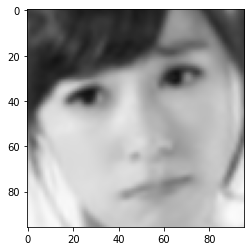

In [26]:
# View a sample training image
print(Le.inverse_transform(np.argmax(label, axis=1))[0])
plt.imshow((image[1].numpy()/255).reshape(96, 96, 3))

In [27]:
# Creating validation dataset object and verifying it
%time val_dataset = get_dataset(val_paths, val_labels, train=False)

image, label = next(iter(val_dataset))
print(image.shape)
print(label.shape)

CPU times: user 36.4 ms, sys: 435 µs, total: 36.8 ms
Wall time: 37.1 ms
(32, 96, 96, 3)
(32, 7)


neutral


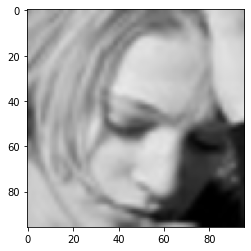

In [28]:
print(Le.inverse_transform(np.argmax(label, axis=1))[0])
plt.imshow((image[1].numpy()/255).reshape(96, 96, 3))

**Training the model**

In [29]:
from tensorflow.keras.applications import EfficientNetB2

In [30]:
## Building EfficientNet model

backbone = EfficientNetB2(
    input_shape=(96, 96, 3),
    include_top=False
)

model = tf.keras.Sequential([
    backbone,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

31801344/31790344 [==============================] - 0s 0us/step


In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb2 (Functional)  (None, 3, 3, 1408)        7768569   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1408)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               180352    
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 903       
Total params: 7,949,824
Trainable params: 7,882,249
Non-trainable params: 67,575
_________________________________________________________________


In [32]:
## Compiling the model 
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'categorical_crossentropy',
    metrics = ["accuracy", tf.keras.metrics.Precision(name ="precision"), tf.keras.metrics.Recall(name="recall")]
)

Tuning the CNN layers to learn the pattern in current data

In [33]:
# Train the model
history = model.fit(
    train_dataset,
    steps_per_epoch=len(train_paths)//batch_size,
    epochs=12,
    validation_data=val_dataset,
    validation_steps = len(val_paths)//batch_size,
    class_weight = class_weight
)

Epoch 1/12
672/672 [==============================] - 214s 250ms/step - loss: 2.7845 - accuracy: 0.4065 - precision: 0.6630 - recall: 0.1911 - val_loss: 1.3850 - val_accuracy: 0.4703 - val_precision: 0.6497 - val_recall: 0.3188
Epoch 2/12
672/672 [==============================] - 167s 246ms/step - loss: 2.3526 - accuracy: 0.4925 - precision: 0.6911 - recall: 0.2948 - val_loss: 1.3747 - val_accuracy: 0.4801 - val_precision: 0.6030 - val_recall: 0.3100
Epoch 3/12
672/672 [==============================] - 166s 247ms/step - loss: 2.2211 - accuracy: 0.5163 - precision: 0.6964 - recall: 0.3213 - val_loss: 1.1630 - val_accuracy: 0.5526 - val_precision: 0.7001 - val_recall: 0.3712
Epoch 4/12
672/672 [==============================] - 165s 246ms/step - loss: 2.1312 - accuracy: 0.5390 - precision: 0.7030 - recall: 0.3528 - val_loss: 1.2204 - val_accuracy: 0.5554 - val_precision: 0.7173 - val_recall: 0.3613
Epoch 5/12
672/672 [==============================] - 166s 246ms/step - loss: 2.0245 - a

Freezing all the layers of our model and only train the last layers where we do the classification

In [34]:
## Turn off the backbone
model.layers[0].trainable = False

In [35]:
## Defining callbacks
checkpoint = tf.keras.callbacks.ModelCheckpoint("best_weights.h5", verbose=1, save_best_only=True, save_weights_only=True)
early_stop = tf.keras.callbacks.EarlyStopping(patience=3)

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb2 (Functional)  (None, 3, 3, 1408)        7768569   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1408)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               180352    
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 903       
Total params: 7,949,824
Trainable params: 181,255
Non-trainable params: 7,768,569
_________________________________________________________________


In [37]:
# Training the model
history = model.fit(
    train_dataset,
    steps_per_epoch = len(train_paths)//batch_size,
    epochs = 8,
    callbacks = [checkpoint, early_stop],
    validation_data = val_dataset,
    validation_steps = len(val_paths)//batch_size,
    class_weight = class_weight
)

Epoch 1/8
672/672 [==============================] - 165s 245ms/step - loss: 1.6487 - accuracy: 0.6274 - precision: 0.7447 - recall: 0.4914 - val_loss: 1.0868 - val_accuracy: 0.6018 - val_precision: 0.6953 - val_recall: 0.4987

Epoch 00001: val_loss improved from inf to 1.08684, saving model to best_weights.h5
Epoch 2/8
672/672 [==============================] - 165s 245ms/step - loss: 1.5888 - accuracy: 0.6365 - precision: 0.7522 - recall: 0.5083 - val_loss: 1.1586 - val_accuracy: 0.5908 - val_precision: 0.6715 - val_recall: 0.4914

Epoch 00002: val_loss did not improve from 1.08684
Epoch 3/8
672/672 [==============================] - 164s 245ms/step - loss: 1.5732 - accuracy: 0.6453 - precision: 0.7607 - recall: 0.5171 - val_loss: 1.1186 - val_accuracy: 0.5868 - val_precision: 0.6873 - val_recall: 0.4701

Epoch 00003: val_loss did not improve from 1.08684
Epoch 4/8
672/672 [==============================] - 166s 247ms/step - loss: 1.5577 - accuracy: 0.6422 - precision: 0.7571 - recal

**Testing the model**

In [ ]:
backbone = EfficientNetB2(
    input_shape=(96, 96, 3),
    include_top=False
)

model = tf.keras.Sequential([
    backbone,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'categorical_crossentropy',
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')]
)

In [ ]:
model.load_weights("best_weights.h5")

In [ ]:
## setting paths for images
test_image_paths = list(test_data.glob("*/*"))
test_image_paths = list(map(lambda x: str(x), train_image_paths))
test_image_labels = list(map(lambda x: get_label(x), test_image_paths))

test_image_labels = Le.transform(test_image_labels)
test_image_labels = tf.keras.utils.to_categorical(test_image_labels)

test_image_paths = tf.convert_to_tensor(test_image_paths)
test_image_labels = tf.convert_to_tensor(test_image_labels)

def decode_image(image, label):
  image = tf.io.read_file(image)
  image = tf.io.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [96, 96], method='bilinear')

  return image, label

test_dataset = (
    tf.data.Dataset.from_tensor_slices((test_image_paths, test_image_labels)).map(decode_image).batch(batch_size)
)

In [ ]:
## Verify test dataset Object
image, label = next(iter(test_dataset))
print(image.shape)
print(label.shape)

happy


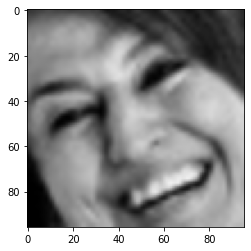

In [45]:
# A view of the validation Images
print(Le.inverse_transform(np.argmax(label, axis=1))[0])
plt.imshow((image[1].numpy()/255).reshape(96, 96, 3))

In [46]:
# Evaluating the loaded model
loss, acc, prec, rec = model.evaluate(test_dataset)

print("Testing accuracy :", acc)
print("Testing loss : ", loss)
print("Testing precision : ", prec)
print("Testing recall :", rec)

898/898 [==============================] - 56s 63ms/step - loss: 0.8360 - accuracy: 0.6892 - precision: 0.7770 - recall: 0.5928
Testing accuracy : 0.6891915202140808
Testing loss :  0.8359957337379456
Testing precision :  0.7770270109176636
Testing recall : 0.5928454399108887


In [47]:
# Save model 
model.save("FacialExpressionModel.h5")

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [50]:
import pickle

In [48]:
def save_object(obj, name:str):

    #pickle_out = open(f"{name}.pkl", "wb")
    #pickle.dump(obj, pickle_out)
    #pickle_out.close()

    with open(f"{name}.pkl", "wb") as f:
        pickle.dump(obj, f)

def load_object(name:str):
    with open(f"{name}.pkl", "rb") as f:
        obj = pickle.load(f)
    return obj

In [51]:
save_object(Le, "LabelEncoder")